In [1]:
from d3blocks import D3Blocks
import pandas as pd
import numpy as np

import copy, os

In [2]:
import d3blocks
d3blocks.__version__

from IPython.display import IFrame

In [3]:
import pickle

def save_pickle(out_path, data):
    with open(out_path, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_pickle(pickle_path):
    with open(pickle_path, 'rb') as handle:
        return pickle.load(handle)

In [4]:
import reeds
from pygromos.files.repdat import Repdat, ExpandedRepdat

from reeds.function_libs.analysis.sampling import analyse_state_transitions

from typing import List
import matplotlib.pyplot as plt

In [5]:
# Notebook based on https://stackoverflow.com/questions/67961842/chord-diagram-in-python

In [6]:
def to_dataframe(matrix, labels=None):
    """
    Convert np.array (matrix) to a pandas dataframe
    """
    n_states, _ = np.shape(matrix)
    new_df = pd.DataFrame()
    
    sources = np.repeat(np.arange(0, n_states), n_states-1)
    
    if labels is None:
        new_df['source'] = sources
    else:
        new_df['source'] = [labels[i] for i in sources]
        
    targets = np.array([])

    for exclude in range(n_states):
        tmp = np.delete(np.arange(0, n_states), exclude)

        targets = np.append(targets, tmp)
    
    if labels is None:
        new_df['target'] = np.array(targets, dtype=int)
    else:
        new_df['target'] = [labels[int(i)] for i in targets]
    
    weights = np.zeros(len(targets)) 

    for k, (s, t) in enumerate(zip(sources, targets)):

        weights[k] = matrix[int(s)][int(t)]
    new_df['weight'] = weights
    
    return new_df

# Load Repdats back from pickles! 

In [27]:
basedir = '//fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks/repdats/pickled'

repdats = [load_pickle(f'{basedir}/FXa_complex_seed{i}_repdat.pkl') for i in range(1, 6)]
# repdats = [load_pickle(f'{basedir}/FXa_ligands_seed{i}_repdat.pkl') for i in range(1, 6)]

### convert to expanded repdat

In [28]:
exp_repdats = [ExpandedRepdat(r) for r in repdats]

In [29]:
tr_matrices = [analyse_state_transitions(er, normalize= False, bidirectional =False) for er in exp_repdats]

In [30]:
tr_matrices2 = [analyse_state_transitions(er, normalize= False, bidirectional =False, min_s=2) for er in exp_repdats]

### optional (save matrices)

In [38]:
#for i, m in enumerate(tr_matrices):
#    np.save(f'./matrices/matrix_{i}.npy', m)

In [8]:
tr_matrices = [ np.load(f'/home/cchampion/work/REEDS/misc/matrices/matrix_{i}.npy') for i in range(5)]

## bidirectional

In [43]:
#tr_matrices_bidir = [analyse_state_transitions(er, normalize= False, bidirectional =True) for er in exp_repdats]
#for i, m in enumerate(tr_matrices_bidir):
#    np.save(f'./matrices/matrix_bidir_{i}.npy', m)

In [44]:
# tr_matrices_bidir = [ np.load(f'./matrices/matrix_bidir_{i}.npy') for i in range(5)]

# Work with the data

In [9]:
labels= ['1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b']

In [10]:
df = to_dataframe(np.sum(tr_matrices, axis=0), labels)

In [31]:
df2 = to_dataframe(np.sum(tr_matrices2, axis=0), labels)

In [14]:
df_logged = copy.deepcopy(df)
tmp = df['weight']
tmp[tmp == 0] = 1
df_logged['weight'] = np.log(tmp) # tmp ** (1/3)  #np.sqrt(tmp)

/tmp/ipykernel_810423/3311844109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[tmp == 0] = 1


# Plot 

In [22]:
def make_chord_diagram(df, outfile, labels, cmap = 'magma'):
    d3 = D3Blocks(chart='Chord', frame=False, )

    d3.config['fontsize'] = 18
    d3.config['ordering'] = ''
    d3.config['arrowhead'] = 1
    d3.config['filepath'] = outfile
    d3.config['figsize'] = [600, 600]
    d3.config['notebook'] = True
    d3.config['save_button'] = True
    # save_button=True
    
    d3.set_node_properties(df, opacity=1, cmap=cmap, fontsize=18)
    d3.set_edge_properties(df, color='source', opacity=0.8)
    #
    d3.show()

def make_chord_diagram2(df, outfile, labels, cmap = 'magma'):
    d3 = D3Blocks(chart='Chord', frame=False,)

    d3.config['fontsize'] = 18
    d3.config['ordering'] = ''
    d3.config['arrowhead'] = 1
    d3.config['filepath'] = outfile
    d3.config['figsize'] = [600, 600]
    d3.config['notebook'] = True
    d3.config['save_button'] = True

    
    d3.set_node_properties(df, opacity=1, cmap=cmap, fontsize=18)
    d3.set_edge_properties(df, color='source', opacity=0.8)
    #
    
    
    #d3.node_properties.get(labels[-1])['color']='#000000'
    #d3.node_properties.get(labels[-2])['color']='#000055'
    
    #d3.edge_properties.loc[d3.edge_properties['source'] == labels[-1], 'color'] = '#000000'
    #d3.edge_properties.loc[d3.edge_properties['source'] == labels[-2], 'color'] = '#000055'
    
    # in principle possible to set the complete set of colors like this instead of providing a colormap 
    
    d3.show()
    
    return d3
    

In [12]:
4./3*np.arange(20*3/4).astype(int)

array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
        6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
       13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667])

In [13]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])

colors_tab20b =  plt.cm.tab20b( (4./3*np.arange(20*3/4)).astype(int) )
#plt.scatter(np.arange(15),np.ones(15), c=colors_tab20b, s=180)

colors_tab20c =  plt.cm.tab20c( (4./3*np.arange(20*3/4)).astype(int) )
plt.scatter(np.arange(15),np.ones(15), c=colors_tab20c, s=180)

plt.show()


cmap = ListedColormap([colors_tab20b[0], colors_tab20b[1], 
                       colors_tab20b[3], colors_tab20b[4], 
                       colors_tab20b[6], colors_tab20b[7], 
                       colors_tab20b[9], colors_tab20b[10],
                       colors_tab20b[12], colors_tab20b[13],
                       
                       colors_tab20c[3], colors_tab20c[4], 
                       colors_tab20c[12], colors_tab20c[13],
                       colors_tab20c[0], colors_tab20c[1], 
                      ])


/tmp/ipykernel_811287/3653271068.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [14]:
colors_tab20c

array([[0.19215686, 0.50980392, 0.74117647, 1.        ],
       [0.41960784, 0.68235294, 0.83921569, 1.        ],
       [0.61960784, 0.79215686, 0.88235294, 1.        ],
       [0.90196078, 0.33333333, 0.05098039, 1.        ],
       [0.99215686, 0.55294118, 0.23529412, 1.        ],
       [0.99215686, 0.68235294, 0.41960784, 1.        ],
       [0.19215686, 0.63921569, 0.32941176, 1.        ],
       [0.45490196, 0.76862745, 0.4627451 , 1.        ],
       [0.63137255, 0.85098039, 0.60784314, 1.        ],
       [0.45882353, 0.41960784, 0.69411765, 1.        ],
       [0.61960784, 0.60392157, 0.78431373, 1.        ],
       [0.7372549 , 0.74117647, 0.8627451 , 1.        ],
       [0.38823529, 0.38823529, 0.38823529, 1.        ],
       [0.58823529, 0.58823529, 0.58823529, 1.        ],
       [0.74117647, 0.74117647, 0.74117647, 1.        ]])

In [15]:
len(blues)

NameError: name 'blues' is not defined

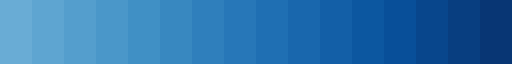

In [16]:
blues =  plt.cm.Blues(np.arange(256))
idx = np.arange(129, 256, 8)
cmap = ListedColormap(blues[idx])
cmap

In [33]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"


d3 = make_chord_diagram2(df2, outfile, labels, cmap='viridis')

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [36]:
d3.edge_properties.loc[d3.edge_properties['source'] == '1a', 'color'] = '#000000'

NameError: name 'd3' is not defined

In [37]:
d3.edge_properties

NameError: name 'd3' is not defined

In [38]:
from html2image import Html2Image
hti = Html2Image()


In [39]:
hti.screenshot(url=f"{cur_cwd}/d3blocks_file.html", save_as='python_org.png')


[1113/092646.464888:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1113/092646.955356:WARNING:angle_platform_impl.cc(49)] RendererVk.cpp:1962 (initialize): ANGLE VMA version: 2003000
[1113/092646.958337:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[1113/092646.961294:ERROR:command_buffer_proxy_impl.cc(127)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
8143 bytes written to file /fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks/python_org.png


['/fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks/python_org.png']

In [74]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

In [75]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

make_chord_diagram(df2, outfile, labels)

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/cchampion/work/REEDS/misc/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [276]:
df3 = copy.deepcopy(df)

tmp_arr = np.array(df['weight'])

tr_min_display = np.max(tmp_arr) / 20
idx = np.where((tmp_arr < tr_min_display) & (tmp_arr != 0))
tmp_arr[idx] = tr_min_display

df3['weight'] = tmp_arr

In [277]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

make_chord_diagram(df3, outfile, labels)

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/cchampion/work/REEDS/misc/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [278]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

make_chord_diagram(df_logged, outfile, labels)

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/cchampion/work/REEDS/misc/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


# Do the same for the GSK3b dataset

In [209]:
basedir = '/home/cchampion/work/REEDS/misc/repdats/pickled'
repdats_lig = [load_pickle(f'{basedir}/GSK3b_ligands_seed{i}_repdat.pkl') for i in range(1, 6)]

In [210]:
exp_repdats_lig = [ExpandedRepdat(r) for r in repdats_lig]

In [22]:
labels= ['9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', '13a', '13b', '14a', '14b', '15a', '15b', '16a', '16b']

In [211]:
tr_matrices_lig = [analyse_state_transitions(er, normalize= False, bidirectional =False) for er in exp_repdats_lig]

In [214]:
df = to_dataframe(np.sum(tr_matrices_lig, axis=0), labels)

In [221]:
tr_matrices_lig2 = [analyse_state_transitions(er, normalize= False, bidirectional =False, min_s =2) for er in exp_repdats_lig]
df2 = to_dataframe(np.sum(tr_matrices_lig2, axis=0), labels)

In [228]:
tr_matrices_lig4 = [analyse_state_transitions(er, normalize= False, bidirectional =False, min_s =16) for er in exp_repdats_lig]
df4 = to_dataframe(np.sum(tr_matrices_lig4, axis=0), labels)

In [216]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

d3 = D3Blocks(chart='Chord', frame=False)

d3.config['fontsize'] = 24
d3.config['ordering'] = ''
d3.config['arrowhead'] = 1
d3.config['filepath'] = outfile
d3.config['figsize'] = [600, 600]
d3.config['notebook'] = True

d3.set_node_properties(df, opacity=1, cmap='viridis', fontsize=18)
d3.set_edge_properties(df, color='source', opacity=0.5)
#
d3.show()

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/cchampion/work/REEDS/misc/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [229]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

make_chord_diagram(df4, outfile, labels, cmap='viridis')

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/cchampion/work/REEDS/misc/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [231]:
df_logged = copy.deepcopy(df)
tmp = df['weight']
tmp[tmp == 0] = 1
df_logged['weight'] = np.log10(tmp)

/tmp/ipykernel_608011/2089020048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[tmp == 0] = 1


In [232]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

make_chord_diagram(df_logged, outfile, labels, cmap='viridis')

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/cchampion/work/REEDS/misc/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


# Same thing for complex

In [9]:
basedir = '/fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks/repdats/pickled'
repdats = [load_pickle(f'{basedir}/GSK3b_complex_10ns_seed{i}_repdat.pkl') for i in range(1, 6)]

In [11]:
exp_repdats = [ExpandedRepdat(r) for r in repdats]

In [12]:
tr_matrices = [analyse_state_transitions(er, normalize= False, bidirectional =False) for er in exp_repdats]

In [13]:
tr_matrices_norm = [analyse_state_transitions(er, normalize=True, bidirectional =False) for er in exp_repdats]

In [14]:
tr_matrices_mins = [analyse_state_transitions(er, normalize=False, bidirectional =False, min_s = 2) for er in exp_repdats]

In [15]:
tr_matrices_mins_norm = [analyse_state_transitions(er, normalize=True, bidirectional =False, min_s = 2) for er in exp_repdats]

/home/cchampion/programs/reeds/reeds/function_libs/analysis/sampling.py:401: RuntimeWarning: invalid value encountered in divide
  transition_counts = transition_counts / tot_trans[:, np.newaxis]
/home/cchampion/programs/reeds/reeds/function_libs/analysis/sampling.py:401: RuntimeWarning: invalid value encountered in divide
  transition_counts = transition_counts / tot_trans[:, np.newaxis]
/home/cchampion/programs/reeds/reeds/function_libs/analysis/sampling.py:401: RuntimeWarning: invalid value encountered in divide
  transition_counts = transition_counts / tot_trans[:, np.newaxis]


In [23]:
df = to_dataframe(np.sum(tr_matrices, axis=0), labels)

In [49]:
df_mins = to_dataframe(np.sum(tr_matrices_mins, axis=0), labels)

In [25]:
df_mins16 = to_dataframe(np.sum(tr_matrices_mins16, axis=0), labels)

In [52]:
df_norm = to_dataframe(np.sum(tr_matrices_mins_norm, axis=0), labels)

In [31]:
df_logged = copy.deepcopy(df)
tmp = df['weight']
tmp[tmp == 0] = 1
df_logged['weight'] = np.log(tmp)

/tmp/ipykernel_125804/3885444208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[tmp == 0] = 1


In [43]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

make_chord_diagram(df, outfile, labels, cmap='viridis')

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/cchampion/work/REEDS/misc/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [42]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

make_chord_diagram(df_norm, outfile, labels, cmap='viridis')

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/cchampion/work/REEDS/misc/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [33]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

make_chord_diagram(df_logged, outfile, labels, cmap='viridis')

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/cchampion/work/REEDS/misc/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [50]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

make_chord_diagram(df_mins, outfile, labels, cmap='viridis')

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/cchampion/work/REEDS/misc/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [54]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file.html"

make_chord_diagram(df_norm, outfile, labels, cmap='viridis')

IFrame('d3blocks_file.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/cchampion/work/REEDS/misc/d3blocks_file.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [36]:
plt.matshow(np.log(np.sum(tr_matrices, axis=0)), cmap='Blues')

/tmp/ipykernel_125804/3682629669.py:1: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(np.sum(tr_matrices, axis=0)), cmap='Blues')


In [37]:
plt.matshow(np.log(np.sum(tr_matrices_lig, axis=0)), cmap='Blues')

NameError: name 'tr_matrices_lig' is not defined